<a href="https://colab.research.google.com/github/datle2403/datle2403/blob/main/C14_Going_Deeper_The_Mechanics_of_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow computation graphs

Tf performs its computation based on a directed acylic graph (DAG)

In [2]:
import tensorflow as tf
g= tf.Graph()
with g.as_default():
  a= tf.constant(1, name='a')
  b= tf.constant(2, name='b')
  c= tf.constant(3, name='c')
  z= 2*(a-b)+c
with tf.compat.v1.Session(graph=g) as sess:
  print(sess.run(z))

1


In [4]:
g= tf.Graph()
with g.as_default():
  a= tf.compat.v1.placeholder(shape= None, dtype= tf.int32, name= 'tf_a')
  b= tf.compat.v1.placeholder(shape=None, dtype=tf.int32, name= 'tf_b')
  c= tf.compat.v1.placeholder(shape=None, dtype=tf.int32, name= 'tf_c')
  z=2*(a-b)+c
with tf.compat.v1.Session(graph=g) as sess:
  feed_dict={a:1, b:2, c:3}
  print(sess.run(z, feed_dict=feed_dict))

1


Tf 2.0 ver

In [10]:
def compute_z(a,b,c): # <- this is eager execution
  r1= tf.subtract(a,b)
  r2= tf.multiply(2,r1)
  z= tf.add(r2,c)
  return z
# rank0 input
tf.print(compute_z(1,2,3))
# rank1 input
tf.print(compute_z([1],[2],[3]))
# rank2 input
tf.print(compute_z([[1]],[[2]],[[3]]))

1
[1]
[[1]]


Improving compuational performance with function decorators
AutoGraph

In [11]:
@tf.function #<- tranform from python code to graph code for faster execution
def compute_z(a,b,c):
  r1= tf.subtract(a,b)
  r2= tf.multiply(2,r1)
  z= tf.add(r2,c)
  return z
# rank0 input
tf.print(compute_z(1,2,3))
# rank1 input
tf.print(compute_z([1],[2],[3]))
# rank2 input
tf.print(compute_z([[1]],[[2]],[[3]]))

1
[1]
[[1]]


# TensorFlow Variable objects for storing and updating model parameters

a Variable is a special Tensor object that allow us to update and store the parameters of model

In [12]:
a= tf.Variable(initial_value=3.14, name='var_a')
a

<tf.Variable 'var_a:0' shape=() dtype=float32, numpy=3.14>

In [16]:
w= tf.Variable([1,2,3], trainable= False)
# assgin
w.assign([3,1,4], read_value=True)
# assign add
w.assign_add([1,2,3], read_value=True)

<tf.Variable 'UnreadVariable' shape=(3,) dtype=int32, numpy=array([4, 3, 7], dtype=int32)>

In [18]:
# create random variable
tf.random.set_seed(1)
init= tf.keras.initializers.GlorotNormal()
tf.print(init(shape=(3,2)))

[[-0.791783273 1.1114037]
 [0.2758421 -0.632478714]
 [1.01057649 0.273120701]]


In [22]:
class MyModel(tf.Module):
  def __init__(self):
    init= tf.keras.initializers.GlorotNormal()
    self.w1 = tf.Variable(init(shape=(2,3)))
m= MyModel()
m.variables

(<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
 array([[ 1.2180071 ,  0.08606002, -0.83293897],
        [ 0.12410322,  0.9015843 , -0.10481498]], dtype=float32)>,)

In [43]:
w= tf.Variable(1.0)
b= tf.Variable(0.5)
x= tf.convert_to_tensor([1.4])
y= tf.convert_to_tensor([2.1])
with tf.GradientTape(persistent=True) as tape:
  z=tf.add(tf.multiply(w,x), b)
  loss= tf.reduce_sum(tf.square(y-z))
a= tape.gradient(loss, w)
c =tape.gradient(loss, b)

In [44]:
optimizer= tf.keras.optimizers.SGD()
optimizer.apply_gradients(zip([a,c],[w,b]))
w,b

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0056>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.504>)

In [45]:
model= tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=16, activation='relu'))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.build(input_shape=(None,4))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                80        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
Total params: 624
Trainable params: 624
Non-trainable params: 0
_________________________________________________________________


In [47]:
for v in model.variables:
  print(v.name, v.shape)

dense/kernel:0 (4, 16)
dense/bias:0 (16,)
dense_1/kernel:0 (16, 32)
dense_1/bias:0 (32,)


In [54]:
model.variables[0].name

'dense/kernel:0'

In [64]:
model= tf.keras.Sequential()
model.add(
    tf.keras.layers.Dense(
        units=16,
        activation=tf.keras.activations.relu,
        kernel_initializer=tf.keras.initializers.glorot_uniform(),
        bias_initializer= tf.keras.initializers.Constant(2.0)
    )
)
model.add(
    tf.keras.layers.Dense(
        units=32,
        activation=tf.keras.activations.sigmoid,
        kernel_regularizer= tf.keras.regularizers.l1
    )
)
# specify type of optimizer, loss function for training, which metric
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss= tf.keras.losses.BinaryCrossentropy(), metrics=[tf.keras.metrics.Accuracy(),tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

# Solving XOR problem

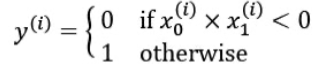

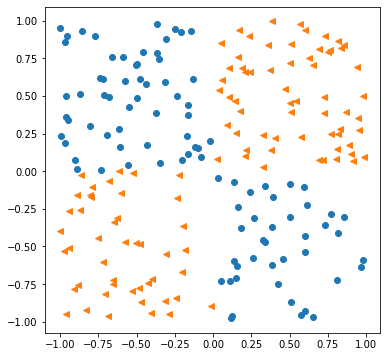

In [102]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.random.set_seed(1)
np.random.seed(1)
x= np.random.uniform(low=-1, high=1, size=(200,2))
y= np.ones(len(x))
y[x[:,0]*x[:,1]<0]=0
x_train=x[:100,:]
y_train= y[:100]
x_valid= x[100:,:]
y_valid= y[100:]

fig= plt.figure(figsize=(6,6))
plt.plot(x[y==0,0],x[y==0,1], 'o')
plt.plot(x[y==1,0],x[y==1,1], '<')

In [88]:
model= tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape=(2,), activation='sigmoid'))
model.summary()
# logistic_reg

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [89]:
model.compile(optimizer=tf.keras.optimizers.SGD(), loss= tf.keras.losses.BinaryCrossentropy(), metrics=[tf.keras.metrics.BinaryAccuracy()])
hist= model.fit(x_train, y_train, epochs=200, batch_size=2, verbose=0, validation_data=(x_valid, y_valid))

  76/1238 [>.............................] - ETA: 1s

<ipython-input-90-0ad59b2d3f1a>:11: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  plot_decision_regions(X=x_valid, y= y_valid.astype(np.integer), classifier= model)


1238/1238 [==============================] - 2s 2ms/step


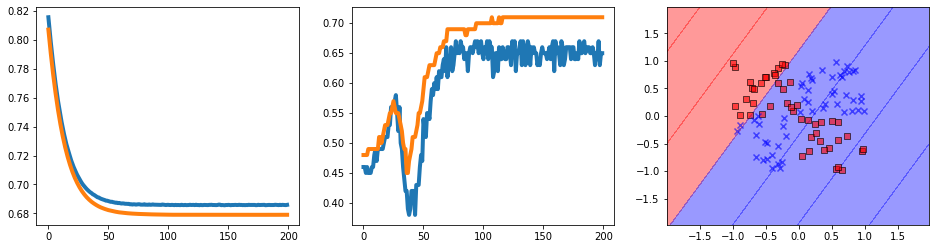

In [90]:
from run import plot_decision_regions
history= hist.history
fig= plt.figure(figsize=(16,4))
ax= fig.add_subplot(1,3,1)
plt.plot(history['loss'], lw=4)
plt.plot(history['val_loss'], lw=4)
ax= fig.add_subplot(1,3,2)
plt.plot(history['binary_accuracy'], lw=4)
plt.plot(history['val_binary_accuracy'], lw=4)
ax= fig.add_subplot(1,3,3)
plot_decision_regions(X=x_valid, y= y_valid.astype(np.integer), classifier= model)

As you can see, logistic reg can not solve XOR problem

In order to derive a nonlinear decision boundary, we can add one or more hidden layers connected vie nonlinear activation

In [91]:
tf.random.set_seed(1)
model= tf.keras.Sequential()
model.add(
    tf.keras.layers.Dense(units=4, input_shape=(2,), activation='relu')
)
model.add(
    tf.keras.layers.Dense(units=4, activation='relu')
)
model.add(
    tf.keras.layers.Dense(units=4, activation='relu')
)
model.add(
    tf.keras.layers.Dense(units=1, activation='sigmoid')
)
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 4)                 12        
                                                                 
 dense_30 (Dense)            (None, 4)                 20        
                                                                 
 dense_31 (Dense)            (None, 4)                 20        
                                                                 
 dense_32 (Dense)            (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [92]:
model.compile(optimizer=tf.keras.optimizers.SGD(), loss=tf.keras.losses.BinaryCrossentropy(), metrics=[tf.keras.metrics.BinaryAccuracy()])
hist=model.fit(x=x_train,y=y_train, validation_data=(x_valid,y_valid), epochs=200, batch_size=2, verbose=0)

  40/1238 [..............................] - ETA: 1s  

<ipython-input-93-0ad59b2d3f1a>:11: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  plot_decision_regions(X=x_valid, y= y_valid.astype(np.integer), classifier= model)


1238/1238 [==============================] - 2s 1ms/step


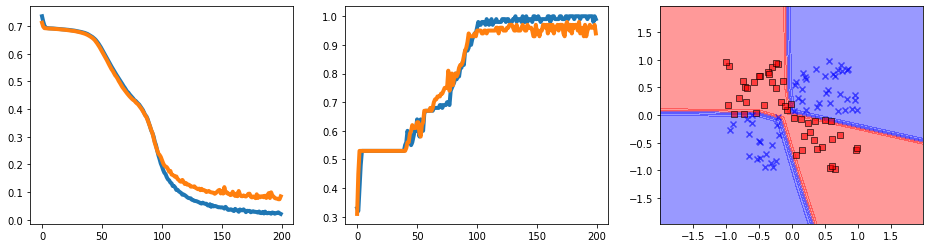

In [93]:
from run import plot_decision_regions
history= hist.history
fig= plt.figure(figsize=(16,4))
ax= fig.add_subplot(1,3,1)
plt.plot(history['loss'], lw=4)
plt.plot(history['val_loss'], lw=4)
ax= fig.add_subplot(1,3,2)
plt.plot(history['binary_accuracy'], lw=4)
plt.plot(history['val_binary_accuracy'], lw=4)
ax= fig.add_subplot(1,3,3)
plot_decision_regions(X=x_valid, y= y_valid.astype(np.integer), classifier= model)

# Making model building more flexible with Keras's functional API


In the previous section, we use keras.Sequential to create model, this is a common way. However, it doesn't allow us to create more complex model that have multiple input,output or intermediate braches.

In [103]:
tf.random.set_seed(1)
# input layer
inputs= tf.keras.Input(shape=(2,))
# hidden layer
h1= tf.keras.layers.Dense(units=4, activation='relu')(inputs)
h2= tf.keras.layers.Dense(units=4, activation='relu')(h1)
h3= tf.keras.layers.Dense(units=4, activation='relu')(h2)
# output
outputs= tf.keras.layers.Dense(units=1, activation='sigmoid')(h3)
# construct model
model= tf.keras.Model(inputs= inputs,outputs= outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_37 (Dense)            (None, 4)                 12        
                                                                 
 dense_38 (Dense)            (None, 4)                 20        
                                                                 
 dense_39 (Dense)            (None, 4)                 20        
                                                                 
 dense_40 (Dense)            (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [109]:
model.compile(optimizer=tf.keras.optimizers.SGD(), metrics= [tf.keras.metrics.BinaryAccuracy()], loss=tf.keras.losses.BinaryCrossentropy())
hist=model.fit(x=x_train, y=y_train, validation_data=(x_valid, y_valid), epochs=200, verbose=0,batch_size=2)

  44/1238 [>.............................] - ETA: 1s  

<ipython-input-110-0ad59b2d3f1a>:11: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  plot_decision_regions(X=x_valid, y= y_valid.astype(np.integer), classifier= model)


1238/1238 [==============================] - 2s 1ms/step


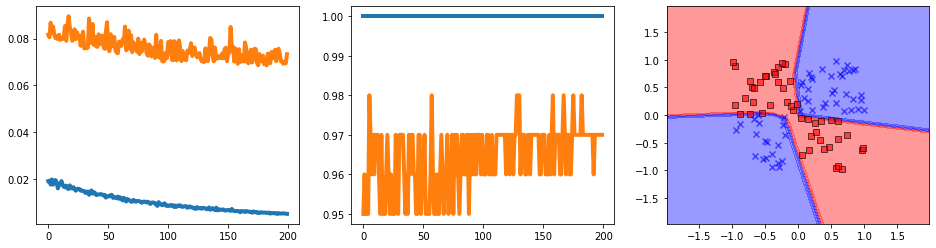

In [110]:
from run import plot_decision_regions
history= hist.history
fig= plt.figure(figsize=(16,4))
ax= fig.add_subplot(1,3,1)
plt.plot(history['loss'], lw=4)
plt.plot(history['val_loss'], lw=4)
ax= fig.add_subplot(1,3,2)
plt.plot(history['binary_accuracy'], lw=4)
plt.plot(history['val_binary_accuracy'], lw=4)
ax= fig.add_subplot(1,3,3)
plot_decision_regions(X=x_valid, y= y_valid.astype(np.integer), classifier= model)